In [16]:
#importing required libraries and packages
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
# Correct the data directory path
data_dir = r"E:\College\Hackathons\gdsc\gdsc\PlantVillage\PlantVillage"  

# Check if the path exists
if not os.path.exists(data_dir):
    raise ValueError(f"Dataset directory '{data_dir}' not found. Please check the path.")

In [20]:
# Define image parameters
img_height = 180
img_width = 180
batch_size = 32

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Use 20% of data for validation
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 20627 files belonging to 15 classes.
Using 16502 files for training.


In [21]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 20627 files belonging to 15 classes.
Using 4125 files for validation.


Class Names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


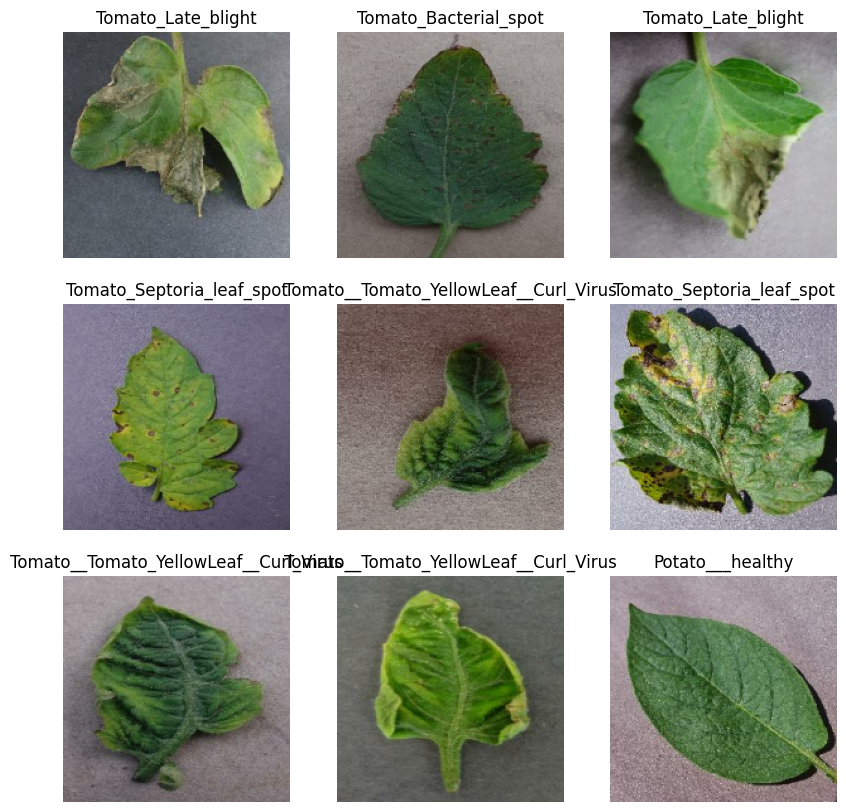

In [22]:
# Display class names
class_names = train_ds.class_names
print("Class Names:", class_names)

# Visualize some sample images from the training set
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [23]:
# Build the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 303s 573ms/step - accuracy: 0.5070 - loss: 1.5653 - val_accuracy: 0.8124 - val_loss: 0.5679
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 325s 630ms/step - accuracy: 0.8384 - loss: 0.4856 - val_accuracy: 0.8448 - val_loss: 0.4457
Epoch 3/10
234/516 ━━━━━━━━━━━━━━━━━━━━ 2:30 535ms/step - accuracy: 0.9024 - loss: 0.3073

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation accuracy: {val_acc:.4f}")

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 20627 files belonging to 15 classes.
Using 16502 files for training.
Found 20627 files belonging to 15 classes.
Using 4125 files for validation.
Class Names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Epoch 1/10


C:\Users\chjvs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 264s 508ms/step - accuracy: 0.5564 - loss: 1.4070 - val_accuracy: 0.8419 - val_loss: 0.4580
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 272s 527ms/step - accuracy: 0.8508 - loss: 0.4463 - val_accuracy: 0.8284 - val_loss: 0.4863
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 270s 523ms/step - accuracy: 0.9178 - loss: 0.2538 - val_accuracy: 0.9001 - val_loss: 0.3087
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 263s 510ms/step - accuracy: 0.9373 - loss: 0.1823 - val_accuracy: 0.8865 - val_loss: 0.3589
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 255s 494ms/step - accuracy: 0.9604 - loss: 0.1099 - val_accuracy: 0.9042 - val_loss: 0.3552
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 317s 615ms/step - accuracy: 0.9727 - loss: 0.0810 - val_accuracy: 0.8873 - val_loss: 0.4553
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 332s 643ms/step - accuracy: 0.9766 - loss: 0.0704 - val_accuracy: 0.8727 - val_loss: 0.5456
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 290s 562ms/step - accuracy: 0.9815 - loss: 0.05

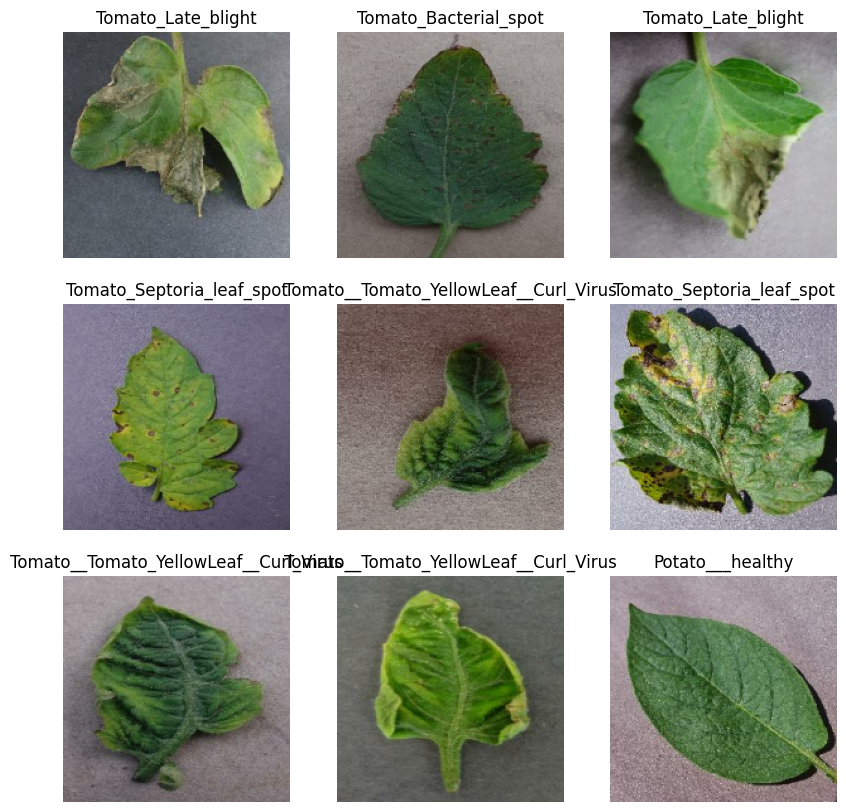

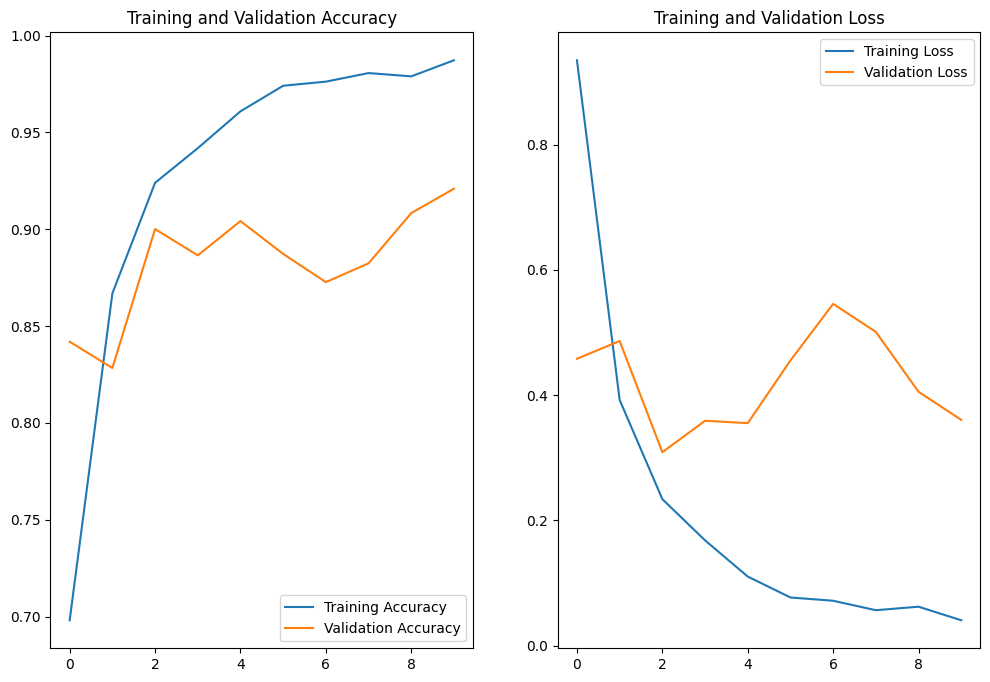

In [7]:
# Function to predict on new images
def predict_image():
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  
    # Create a batch axis

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(f"This image most likely belongs to {class_names[np.argmax(score)]} "
          f"with a {100 * np.max(score):.2f} percent confidence.")
    
predict_image("E:\College\Hackathons\gdsc\gdsc\archive (4)\download.jpeg")

